In [1]:
import re, sys, os
import numpy as np
sys.path.append("./bin")
import matplotlib.pyplot as plt
from functools import partial
import pandas as pd
from matplotlib import colors
import twoconf_x_P_higherac

In [2]:
instance=twoconf_x_P_higherac.GRFCalculations_100_100_15()
othervars=np.array([0])

In [3]:
def getparset(pars):
    ax_0_0,bx_x_0,aP_0_0,bP_P_0,kopen0,kclose0,alpha,beta,gamma,w,kbx=pars
    
    ax_P_0=ax_0_0
    bx_xP_0=bx_x_0/w
    
    aP_x_0=aP_0_0
    bP_xP_0=bP_P_0/w
    
    
    ax_0_1=ax_0_0 #G on rate is the same in both conformations
    bx_x_1=bx_x_0*kbx
    aP_0_1=aP_0_0 #P on rate is the same
    bP_P_1=bP_P_0*beta #<1 #off-rate changes
    
    
    aP_x_1=aP_0_1
    bP_xP_1=bP_P_1/(w*gamma)
    
    ax_P_1=ax_0_1
    bx_xP_1=bx_x_1/(w*gamma)


    kopenx=alpha*kopen0 #>1
    kclosex=kclose0
    kopenP=kopen0
    kcloseP=kclose0*beta #<1
    kopenxP=kopenx
    #deltaG=kcloseG-kclose0
    #deltaP=kcloseP-kclose0
    kclosexP=kclose0*beta/gamma


    parset=[ax_0_0,ax_0_1,bx_x_0,bx_x_1,aP_0_0,aP_0_1,bP_P_0,bP_P_1,aP_x_0,aP_x_1,bP_xP_0,bP_xP_1,ax_P_0,ax_P_1,bx_xP_0,bx_xP_1,kopen0,kclose0,kopenx,kclosex,kopenP,kcloseP,kopenxP,kclosexP]
    return parset


def plot_parset(pars,qs,title=None,widerange=False,color="k",text=None,figname=None):
    if not widerange:
        xvals=np.logspace(-1.,1.,200)
    else:
        xvals=np.logspace(-3,3,1000)
    values=np.zeros(len(xvals))
    #accessibilities=np.zeros(len(xvals))
    xval=0
    parset=getparset(pars)
    parset=np.concatenate((parset,qs))
    instance.fill_num_den(parset,othervars)
    expr0=instance.interfaceGRF(xval)
   

    for x_,xval in enumerate(xvals):
        expr=instance.interfaceGRF(xval)
        
        values[x_]=expr/expr0
        #accessibilities[x_]=acc/acc0
    fig,ax=plt.subplots(1,1,figsize=(3,2.5))
    ax.plot(xvals,values,color=color)
    ax.set_xscale('log')
    ax.set_xlabel(r"$x$",size=14)
    ax.set_ylabel('fold change ($F(x)$)',size=14)
    ax.axhline(y=1,linestyle="--",color="gray")
    if title is not None:
        ax.set_title(title)
    if text is not None:
        ax.text(0.8,0.8,text,transform=ax.transAxes)
    plt.tight_layout()
    if figname is not None:
        plt.savefig(figname,bbox_inches="tight")
    plt.show()
    
def plot_parset_bx(pars,qs,xval,title=None,color="k",text=None,figname=None):
    
    bxvals=np.logspace(-1,1,200)
    values=np.zeros(len(bxvals))
    
    
    #acc0=np.sum(Ps[4:])

    for x_,bxval in enumerate(bxvals):
        pars2=pars.copy()
        pars2[1]=bxval
        parset=getparset(pars2)
        parset=np.concatenate((parset,qs))
        instance.fill_num_den(parset,othervars)
        expr=instance.interfaceGRF(xval)
        expr0=instance.interfaceGRF(0)
        values[x_]=expr/expr0
    fig,ax=plt.subplots(1,1,figsize=(3,2.5))
    ax.plot(bxvals,values,color=color)
    ax.set_xscale('log')
    ax.set_xlabel(r"$b_x$",size=14)
    ax.set_ylabel('fold change ($F(x)$)',size=14)
    ax.axhline(y=1,linestyle="--",color="gray")
    if title is not None:
        ax.set_title(title)
    if text is not None:
        ax.text(0.15,0.8,text,transform=ax.transAxes)
    plt.tight_layout()
    if figname is not None:
        plt.savefig(figname,bbox_inches="tight")
    plt.show()
    




# Look for non-monotonics down-up keeping parameters in the range

In [4]:
sys.path.append("../../../repos/ownutils/scriptsdu/")
from utilsdu import get_score_up_down_v2, score
def ssfunc(parset, xvalar):
    instance.fill_num_den(parset,np.array([0]))
    return instance.interfaceGRF(xvalar[0])

$\alpha>1$, $\omega>1$, $\gamma<1$
$q_i=1 \forall i$
B: $a_x$ = 0.01, $b_x$ = 1, $a_p$ = 0.1, $b_p$ = 100, $k_o$ = 0.01, $k_c$ = 0.5, $\alpha$ = 5, $\beta$ = 0.001, $\gamma$ = 0.01, $\omega$ = 5, $q_3$ = 1, $q_4$ = 1, $q_7$ = 1, $q_8$ = 1, \\
$\alpha<1$, $\omega<1$, $\gamma=1$
$q_3=0.15, q_4=2.09, q_7=0.09, q_8=0.002$
C: $a_x$ = 0.03, $b_x$ = 0.1, $a_p$ = 0.022, $b_p$ = 0.17, $k_o$ = 0.18, $k_c$ = 0.0033, $\alpha$ = 0.0077, $\beta$ = 0.067, $\gamma$ = 1, $\omega$ = 0.7, $q_3$ = 0.15, $q_4$ = 2.09, $q_7$ = 0.09, $q_8$ = 0.002, \\


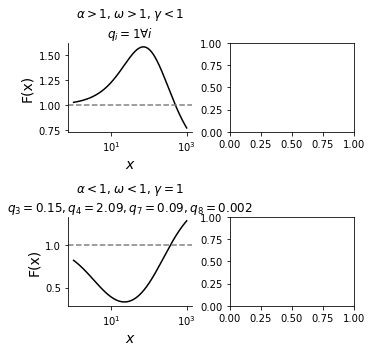

In [10]:
parnames="ax,bx,aP_0_0,bP_P_0,kopen0,kclose0,alpha,beta,gamma,w,kbx".split(",")
parnames_paper=["$a_x$","$b_x$", "$a_p$", "$b_p$", "$k_o$", "$k_c$", "$\\alpha$", "$\\beta$", "$\\gamma$", "$\\omega$", "kbx"]
kbx=1 #we consider x doesn't change binding in closed/open

####parset1: up-down, q_i=1, gamma !=1

ax=0.01
bx=1
aP_0_0=0.1
bP_P_0=100
kopen0=0.01
kclose0=0.5
beta=0.001
gamma=0.01 #gamma<1

#alpha>1, w>1
alpha=5
w=5
qs1=[1,1,1,1]
parset1=np.array([ax,bx,aP_0_0,bP_P_0,kopen0,kclose0,alpha,beta,gamma,w,kbx])
title1=r"$\alpha>1$, $\omega>1$, $\gamma<1$"+"\n"+r"$q_i=1 \forall i$"
####parset2: down-up, q_i=1, gamma != 1

ax= 0.14
bx= 5
aP_0_0= 0.01
bP_P_0= 100
kopen0= 0.014
kclose0= 3.36
alpha= 8 #alpha>1
beta= 0.11
gamma= 50 #gamma>1
w=0.06 #omega<1
parset2=np.array([ax,bx,aP_0_0,bP_P_0,kopen0,kclose0,alpha,beta,gamma,w,kbx])
qs2=[1,1,1,1]
title2=r"$\alpha>1$, $\omega<1$, $\gamma>1$"+"\n"+r"$q_i=1 \forall i$"

####parset3: up-down, q_i!=1, gamma =1
ax=10.4
bx=10
aP_0_0=0.016
bP_P_0=774
kopen0=0.01
kclose0=0.5
alpha=0.3 #alpha<1
w=0.1 #w<1
gamma=1
beta=0.001
qs3=[1,3,5,25]
parset3=np.array([ax,bx,aP_0_0,bP_P_0,kopen0,kclose0,alpha,beta,gamma,w,kbx])
title3=r"$\alpha<1$, $\omega<1$, $\gamma=1$"+"\n"+r"$q_3=%g, q_4=%g, q_7=%g, q_8=%g$"%tuple(qs3)

#####parset4: down-up, q_i!=1, gamma=1

#ax=21.
#bx=1.75
#aP_0_0=20
#bP_P_0=220
#kopen0= 0.0017
#kclose0=0.01
#alpha= 0.017 #alpha<1
#beta=0.115
#gamma= 1.0 
#w=1.95 #omega>1
#
#q3=0.1
#q4=165
#q7=190
#q8= 0.01
#qs4=[q3,q4,q7,q8]
#title4=r"$\alpha<1$, $\omega>1$, $\gamma=1$"+"\n"+r"$q_3=%g, q_4=%g, q_7=%g, q_8=%g$"%tuple(qs4)
#parset4=np.array([ax,bx,aP_0_0,bP_P_0,kopen0,kclose0,alpha,beta,gamma,w,kbx])


##### new parset4, down-up, with alpha<1, w<1, gamma<1, down-up
ax=0.03
bx=0.10
aP_0_0=0.022
bP_P_0=0.17
kopen0=0.18
kclose0=0.0033
alpha=0.0077
beta=0.067
gamma=1.0
w=0.7
q3=0.15
q4=2.09
q7=0.09
q8=0.002
qs4=[q3,q4,q7,q8]
title4=r"$\alpha<1$, $\omega<1$, $\gamma=1$"+"\n"+r"$q_3=%g, q_4=%g, q_7=%g, q_8=%g$"%tuple(qs4)
parset4=np.array([ax,bx,aP_0_0,bP_P_0,kopen0,kclose0,alpha,beta,gamma,w,kbx])


fig,axes=plt.subplots(2,2,figsize=(5,5))
letters=["B:", "C:", "D:", "E:"]
for g,group in enumerate([[parset1,qs1,title1],[parset4,qs4,title4]]):
    pars,qs,title=group
    print(title)
    print(letters[g],end=" ")
    for p in zip(parnames_paper[:-1],pars[:-1]): #last is kbx which is 1 and doesn't appear in paper
        print(p[0],"=","%g"%p[1],end=", ")
    for p in zip("$q_3$,$q_4$,$q_7$,$q_8$".split(","),qs):
        print(p[0],"=","%g"%p[1],end=", ")
    print("\\\\")
    
    parset=getparset(pars)
    parset=np.concatenate((parset,qs))
    instance.fill_num_den(parset,othervars)
    expr0=instance.interfaceGRF(0)
    xvals=np.logspace(0,3,1000)
    expr=np.zeros_like(xvals)
    for x_,x in enumerate(xvals):
        expr[x_]=instance.interfaceGRF(x)/expr0
    ax=axes[g%2][g//2]
    ax.plot(xvals,expr,color="k")
    ax.set_xscale('log')
    ax.set_xlabel(r"$x$",size=14)
    ax.set_ylabel('F(x)',size=14)
    ax.axhline(y=1,linestyle="--",color="gray")
    ax.set_title(title)
    ax.spines[['right', 'top']].set_visible(False)

plt.tight_layout()
plt.savefig("./figscode/FigS2nonm.svg",bbox_inches="tight")
plt.show()


Parameters were selected from scans and manually refined. Not executed again when preparing the repo.

In [8]:
#qi=1, gamma==1-> only up-down
   
kbx=1
kwargs={"check_out0":False,"out0_tol":1e-4,"plotmultipeak":True,"verbose":True}
n_per_om=4
np.random.seed(1)

niter=5000
qs=[1,1,1,1]
for i in range(niter):
    if i%500==0:
        print(i)
    
    ax,bx,aP_0_0,bP_P_0,kopen0,kclose0,alpha,w=10**np.random.uniform(-3,3,size=8)
    gamma=1
    beta=10**np.random.uniform(-3,0) #beta<1
    
    if aP_0_0*beta>10**(-3) and aP_0_0*beta<10**3 and aP_0_0<ax and bP_P_0>bx:#keep in range, assume pol has less affinity than x in closed c
        #q3,q4,q7,q8=10**np.random.uniform(-3,3,size=4)
        #qs=[q3,q4,q7,q8]
        
        pars=np.array([ax,bx,aP_0_0,bP_P_0,kopen0,kclose0,alpha,beta,gamma,w,kbx])
        parset=getparset(pars)
        
        parset=np.concatenate((parset,qs))
        instance.fill_num_den(parset,othervars)
        monotonic=instance.interfacemonotonic()
        if np.any(monotonic != -2):
            #print("nonm")
            score_out,f,Amin,Amax,n=score(parset,ssfunc=ssfunc,scoref=get_score_up_down_v2,n=None,Amin=None,Amax=None,plot=False,returnout=True,log2out=True,n_per_om=n_per_om,**kwargs)
            #print(score_out)
            if score_out[0]<0:
                print(i)
                print(",".join(map(str,pars)))
                print(",".join(map(str,qs)))
                log10Amin=np.log10(Amin)
                log10Amax=np.log10(Amax)
                orders_m=log10Amax-log10Amin
                n=int(n_per_om*np.ceil(orders_m))
                Avals=np.logspace(log10Amin,log10Amax,n)
                
                plt.figure(figsize=(4,3))
                plt.plot(Avals,f,color="k")
                plt.xscale("log")
                plt.xlabel("x")
                plt.ylabel("log2(fold change)")
                plt.show()
            else:
                print(".",end=",")

0
up_down
.,up_down
.,mono_up
.,500
.,.,up_down
.,1000
mono_up
.,mono_up
.,up_down
.,up_down
.,up_down
.,up_down
.,up_down
.,1500
.,mono_up
.,up_down
.,up_down
.,up_down
.,up_down
.,2000
.,up_down
.,2500
up_down
.,up_down
.,up_down
.,up_down
.,up_down
.,up_down
.,up_down
.,3000
up_down
.,up_down
.,mono_up
.,3500
mono_up
.,up_down
.,up_down
.,mono_up
.,up_down
.,up_down
.,up_down
.,up_down
.,up_down
.,4000
up_down
.,up_down
.,up_down
.,up_down
.,up_down
.,up_down
.,up_down
.,.,.,up_down
.,.,up_down
.,mono_down
.,4500
up_down
.,.,up_down
.,up_down
.,up_down
.,

0
up_down
.,down_up
86
2.4772661892581835,0.6486270046943065,0.37001967453489515,3.94110979450725,125.8401800786636,32.11635444257954,2.9933895747520975,0.9419753240833579,353.36626750801463,0.0024459067785872,1.0
1,1,1,1


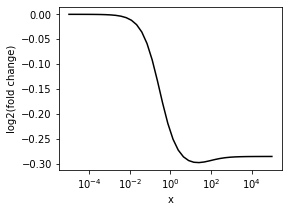

up_down
.,up_down
.,mono_up
.,up_down
.,up_down
.,up_down
.,up_down
.,.,up_down
.,up_down
.,up_down
.,500
down_up
505
30.548066501199447,0.006966866199752542,0.1972356554520426,0.08704333221019941,200.77660850395878,8.556346773612184,0.10033493184599449,0.8251673118819839,0.0013478692169871995,0.16370123459543406,1.0
1,1,1,1


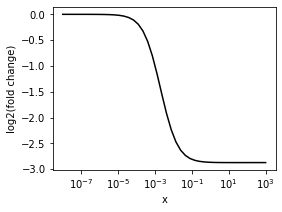

mono_down
571
0.0731798106876724,0.0029886778725607944,0.025219766176178996,9.874346836554945,0.1276794267210848,82.85546761557782,9.266791781860016,0.08610073297063169,5.573225511933686,0.3324046103759393,1.0
1,1,1,1


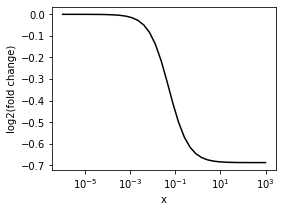

mono_up
.,down_up
587
149.3658385906767,61.210655178671786,0.01099165835548991,897.9653386994034,0.0015222060619669553,0.22692940774230086,33.6053089136754,0.591727353899764,695.7257816401808,0.007124589603384621,1.0
1,1,1,1


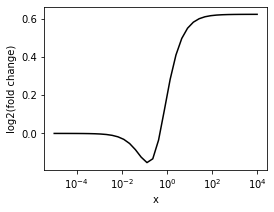

up_down
.,up_down
.,up_down
.,mono_up
.,.,down_up
893
0.05099318632781593,0.14763741515525747,0.016659935714523108,6.801553625875852,227.467032749805,0.11224823927531302,0.0055768978406488005,0.16014564092713807,0.12191626771546715,5.758831311100254,1.0
1,1,1,1


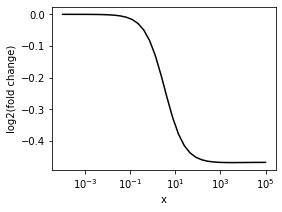

.,up_down
.,1000
mono_up
.,up_down
.,up_down
.,down_up
1249
0.46581468618233984,0.1887905288846998,0.008960199905470662,28.278934714386654,935.2240237488301,0.0015545833374537923,0.0015697337546785293,0.9843658882713993,0.015414266884953995,38.256118623441715,1.0
1,1,1,1


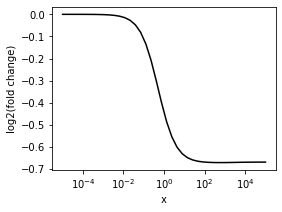

up_down
.,mono_up
.,up_down
.,.,mono_down
1403
49.632827787338215,0.018904023455156387,0.12544108952768118,62.46047121081294,533.4735833969593,75.1295939739821,0.008661557580993462,0.016680985667899502,0.0021706634739379073,1.9078992182279082,1.0
1,1,1,1


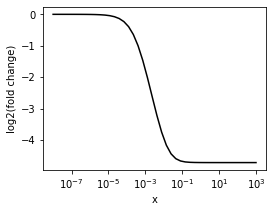

up_down
.,1500
down_up
1514
882.2523461136226,11.992940413651453,1.8331265321627581,378.9683217804615,965.7073809829166,73.93077194028257,0.004111441113157379,0.04615909483748563,0.003069290070172318,0.3058390122237485,1.0
1,1,1,1


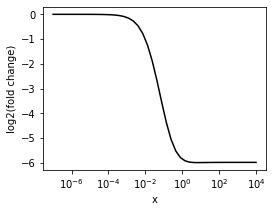

mono_up
.,up_down
.,up_down
.,up_down
.,.,up_down
.,up_down
.,up_down
.,down_up
1858
278.66700172054516,2.910028015168325,0.11150148940076617,8.387999964323088,0.04513353835489226,0.0011931598498952378,0.006375220798999411,0.2847705716717186,0.005886651419439684,61.291315843264485,1.0
1,1,1,1


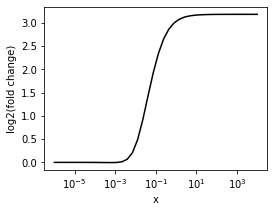

up_down
.,up_down
.,2000
up_down
.,up_down
.,up_down
.,up_down
.,down_up
2090
876.7386790618968,0.017552700520704703,0.2864003903006244,799.0788833182797,2.0131410519916497,0.03129324161116758,0.0453265990944336,0.3566779964365438,0.27938094239905,1.752858199945798,1.0
1,1,1,1


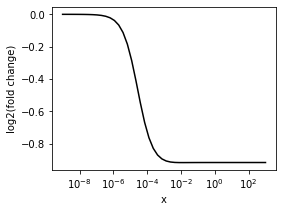

up_down
.,mono_up
.,down_up
2196
101.8141839129652,0.0044328004534828404,0.1758429587597799,4.183773632023698,478.017661118252,1.2869484814176138,0.02020413179415494,0.6085120729940228,0.0076519575191340925,0.433758898732824,1.0
1,1,1,1


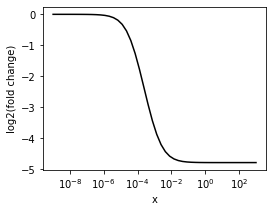

down_up
2271
0.20688388907665994,36.136444110811084,0.006064635700061184,41.97145747666548,0.07757902252094123,0.07149352646848627,0.011636897154687824,0.2959208784805296,0.0056296589813674405,0.7904312345394964,1.0
1,1,1,1


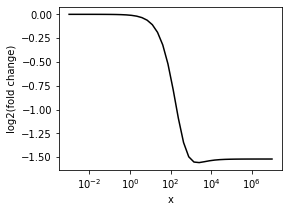

down_up
2299
0.00727081920193129,0.004383209036138285,0.006128533731396066,0.21999271604237497,60.33544826079196,0.46099073415677466,0.0072924923417853876,0.2421703757950161,0.004961315041819207,0.08991943761807782,1.0
1,1,1,1


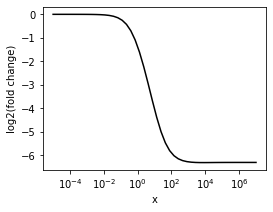

.,up_down
.,2500
up_down
.,up_down
.,.,down_up
2679
862.6659023003252,0.04094752633816534,0.08068707033421735,105.16350113854259,0.0025833967530557726,0.01693519468337217,0.0017568315633264475,0.05413479098875259,0.011989856682750969,1.9186840740768702,1.0
1,1,1,1


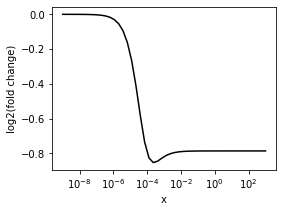

mono_down
2820
17.771208795277484,0.0032253943179096894,0.329622679426016,13.955466746458098,127.86577991946433,103.86560806887336,0.16635723167945834,0.046436198421145096,0.02993104239581826,11.668550690358996,1.0
1,1,1,1


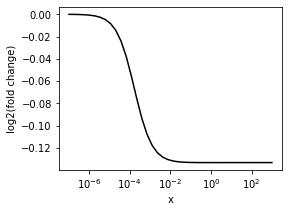

.,3000
up_down
.,down_up
3065
4.668140647602819,1.5904424199009832,1.5826844762178505,191.00443730356386,0.014750282161781883,0.0028777116617268394,0.0015926249005315106,0.003561496358619174,0.002430085372675678,6.928164749117479,1.0
1,1,1,1


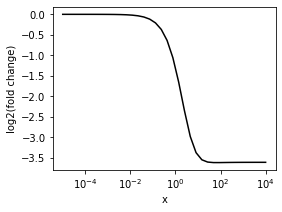

up_down
.,down_up
3082
10.425745522147054,18.433244808055708,0.015398447162478651,774.4347934593153,0.013751676256667998,3.360221103526342,8.339042610193177,0.17098635318412897,85.80472835360453,0.0702330852331913,1.0
1,1,1,1


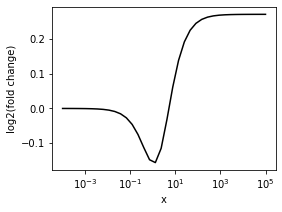

.,up_down
.,up_down
.,up_down
.,up_down
.,.,down_up
3394
462.8872900622487,2.603418089251141,18.05298806010225,11.2156141669799,0.7537255091939046,20.37122540211256,0.004282310731268841,0.029110002426655675,0.006849248336942977,2.8395731485886118,1.0
1,1,1,1


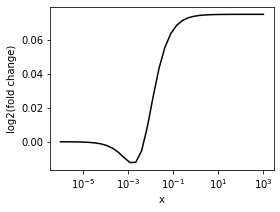

up_down
.,.,up_down
.,3500
.,mono_up
.,.,up_down
.,.,down_up
3792
45.59748321126271,0.012461025971210404,0.03025704117689469,0.9883276962916984,2.19660101048921,0.10043939252645236,0.009002265646308502,0.07889408441780704,0.015218254883426475,0.4926236752257491,1.0
1,1,1,1


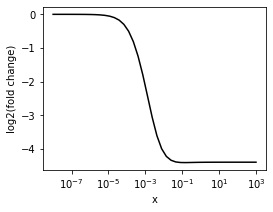

down_up
3821
2.08703035423506,0.6555663103687599,1.0893482299169017,0.7848863863997454,0.2942494464943654,359.91566430660123,1.2498423110976675,0.0017055650044287027,81.10262109610748,0.0021454298330782625,1.0
1,1,1,1


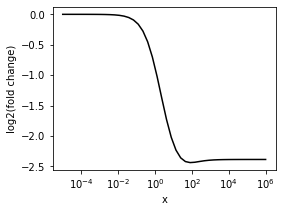

up_down
.,up_down
.,up_down
.,up_down
.,up_down
.,4000
up_down
.,up_down
.,up_down
.,4500
up_down
.,up_down
.,up_down
.,up_down
.,up_down
.,up_down
.,.,up_down
.,up_down
.,up_down
.,up_down
.,.,

In [6]:
#qi=1, gamma!=1
   
kbx=1
kwargs={"check_out0":False,"out0_tol":1e-4,"plotmultipeak":True,"verbose":True}
n_per_om=4
np.random.seed(1)

niter=5000
qs=[1,1,1,1]
for i in range(niter):
    if i%500==0:
        print(i)
    
    ax,bx,aP_0_0,bP_P_0,kopen0,kclose0,alpha,gamma,w=10**np.random.uniform(-3,3,size=9)
    beta=10**np.random.uniform(-3,0) #beta<1
    
    if aP_0_0*beta>10**(-3) and aP_0_0*beta<10**3 and aP_0_0<ax and bP_P_0>bx:#keep in range, assume pol has less affinity than x in closed c
        #q3,q4,q7,q8=10**np.random.uniform(-3,3,size=4)
        #qs=[q3,q4,q7,q8]
        
        pars=np.array([ax,bx,aP_0_0,bP_P_0,kopen0,kclose0,alpha,beta,gamma,w,kbx])
        parset=getparset(pars)
        
        parset=np.concatenate((parset,qs))
        instance.fill_num_den(parset,othervars)
        monotonic=instance.interfacemonotonic()
        if np.any(monotonic != -2):
            #print("nonm")
            score_out,f,Amin,Amax,n=score(parset,ssfunc=ssfunc,scoref=get_score_up_down_v2,n=None,Amin=None,Amax=None,plot=False,returnout=True,log2out=True,n_per_om=n_per_om,**kwargs)
            #print(score_out)
            if score_out[0]<0:
                print(i)
                print(",".join(map(str,pars)))
                print(",".join(map(str,qs)))
                log10Amin=np.log10(Amin)
                log10Amax=np.log10(Amax)
                orders_m=log10Amax-log10Amin
                n=int(n_per_om*np.ceil(orders_m))
                Avals=np.logspace(log10Amin,log10Amax,n)
                plt.figure(figsize=(4,3))
                plt.plot(Avals,f,color="k")
                plt.xscale("log")
                plt.xlabel("x")
                plt.ylabel("log2(fold change)")
                plt.show()
            else:
                print(".",end=",")
        


('ax', 10.425745522147054)
('bx', 18.433244808055708)
('aP_0_0', 0.015398447162478651)
('bP_P_0', 774.4347934593153)
('kopen0', 0.013751676256667998)
('kclose0', 3.360221103526342)
('alpha', 8.339042610193177)
('beta', 0.17098635318412897)
('gamma', 85.80472835360453)
('w', 0.0702330852331913)
('kbx', 1.0)
('q3', 1)
('q4', 1)
('q7', 1)
('q8', 1)


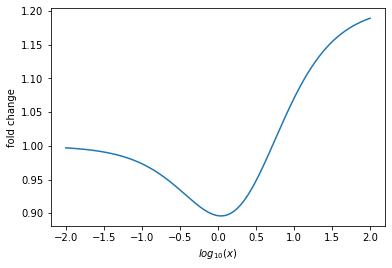

In [7]:
parnames="ax,bx,aP_0_0,bP_P_0,kopen0,kclose0,alpha,beta,gamma,w,kbx".split(",")
pars=np.array([10.425745522147054,18.433244808055708,0.015398447162478651,774.4347934593153,0.013751676256667998,3.360221103526342,8.339042610193177,0.17098635318412897,85.80472835360453,0.0702330852331913,1.0])
qs=[1,1,1,1]
for p in zip(parnames,pars):
    print(p)
for p in zip("q3,q4,q7,q8".split(","),qs):
    print(p)
parset=getparset(pars)
parset=np.concatenate((parset,qs))
instance.fill_num_den(parset,othervars)
expr0=instance.interfaceGRF(0)
xvals=np.logspace(-2,2,1000)
expr=np.zeros_like(xvals)
for x_,x in enumerate(xvals):
    expr[x_]=instance.interfaceGRF(x)/expr0
plt.plot(np.log10(xvals),expr)
plt.xlabel(r"$log_{10}(x)$")
plt.ylabel("fold change")
plt.show()


0
up_down
.,up_down
.,down_up
156
869.5623349125516,0.011603185121920555,84.8555868555081,0.0243181960683164,0.002227690640715345,0.006806112263181141,408.2429496880311,0.007375330499203113,1.0,214.41374389535753,1.0
485.94195504493695,125.77178116542734,0.40544202697567666,0.6431278685496455


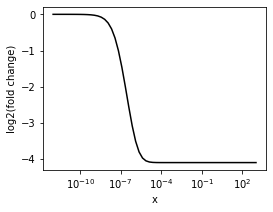

up_down
.,down_up
228
234.86930616419886,0.004606219627201804,24.3683216886012,1.8742478066916566,4.35725104869836,0.0015090292738027284,0.007594239310675502,0.001034227648663062,1.0,0.050570745135270476,1.0
10.350153405907301,166.55117216148378,1.9134180020495677,1.8154499697826454


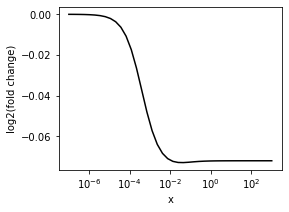

up_down
.,down_up
292
0.06324569937824685,0.010615100094034543,0.013726199743110377,0.6032911109338223,1.1461562732602024,1.173489851163188,961.2421279787168,0.18557081074995013,1.0,0.005992042756360399,1.0
57.881594094768666,3.230692270497354,0.5976254471060028,229.3822582940985


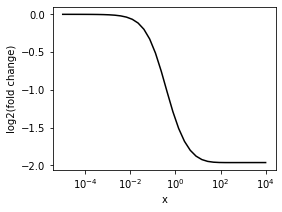

up_down
.,down_up
499
136.06260730060748,0.022575219971911937,1.7502351523263666,0.07778605237857429,0.005221640574359395,0.007465720322006331,416.5133310529287,0.08906978166178654,1.0,0.014789536619468384,1.0
0.027209900122033462,1.421731010928852,0.006078623219507215,0.05460621519173645


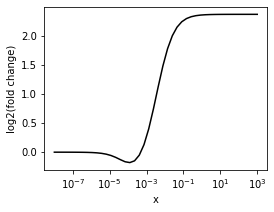

500
up_down
.,down_up
532
434.6022696996295,0.03244010572974303,52.638766325963125,0.9365927641279981,221.51403112430086,0.04541424920512515,0.0012344726006993355,0.4999254643466114,1.0,0.0024510153312928985,1.0
7.029126180914778,24.077552042543708,1.0621117837995,2.215376795510199


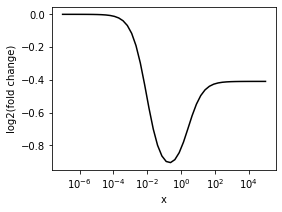

up_down
.,up_down
.,down_up
655
12.177381592488873,0.07203964635834036,0.19679779280689785,36.77651817169356,0.09553984635852049,0.002414328873770988,0.0018907179390430164,0.025618119620005708,1.0,0.006449888396159462,1.0
0.2016622485047963,11.250988572703912,0.0037356616452946475,0.00935037976973455


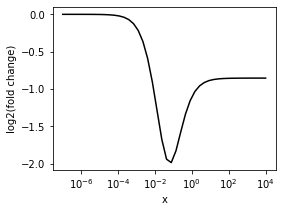

up_down
.,mono_up
.,up_down
.,down_up
784
21.369925978246965,1.7562052965765018,18.970244004978806,220.06496710459825,0.0016660417626531243,0.009320640026536908,0.017262090983741405,0.11547605550856133,1.0,1.94604634122423,1.0
0.11323747833441965,165.50559776036175,188.4456843426711,0.013827095734449296


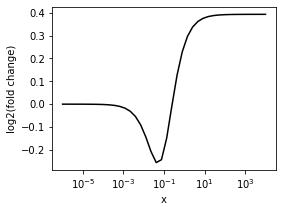

up_down
.,up_down
.,up_down
.,1000
up_down
.,down_up
1083
306.8692331588007,0.18401304737176002,20.907245705864504,1.6888680671846443,0.40826213709886733,0.0045102612940510645,167.43609116455778,0.18902800401619663,1.0,0.009461424040970813,1.0
6.517988586438082,0.5614720815086913,0.0020378285058379477,0.0697839146893613


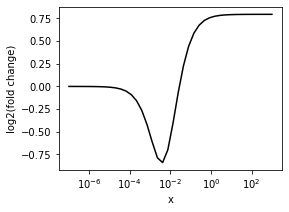

up_down
.,up_down
.,up_down
.,up_down
.,up_down
.,up_down
.,up_down
.,mono_down
1257
82.2591776661079,0.001598017561763531,0.10578399701140323,0.4130475112955125,0.048406904326181395,483.31796379427016,0.20579128581591064,0.671592558979381,1.0,75.88103309489824,1.0
0.002451401389340919,0.005154562835208588,454.48140244386894,0.015359107467687236


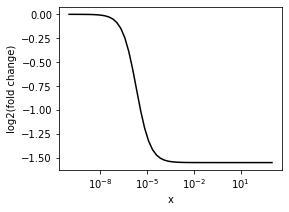

up_down
.,up_down
.,down_up
1466
49.632827787338215,0.018904023455156387,0.12544108952768118,62.46047121081294,533.4735833969593,75.1295939739821,0.008661557580993462,0.04367950570036145,1.0,0.0021706634739379073,1.0
0.27825528285266854,608.3603093524065,2.311476594427727,7.956884016126634


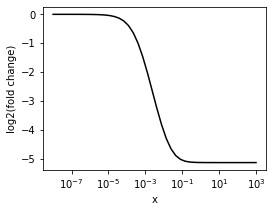

1500
up_down
.,up_down
.,up_down
.,up_down
.,up_down
.,up_down
.,up_down
.,up_down
.,2000
up_down
.,mono_up
.,up_down
.,down_up
2114
0.9906067981655858,0.004320136178799999,0.1760674260686567,0.27952844182459324,0.0033202179332104524,695.5011175886835,45.16593645191482,0.04882536429926373,1.0,0.016493279933079582,1.0
0.1178098163091744,0.02570978346643505,13.834364076411006,456.35895478918934


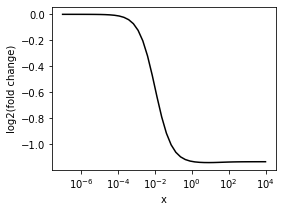

up_down
.,up_down
.,up_down
.,up_down
.,up_down
.,down_up
2421
173.30747685978886,0.0044054784234835494,0.7748549407968003,348.6675676718286,205.8460464873845,0.012341089341460686,0.010248439446599082,0.006754526443644187,1.0,79.19885489117455,1.0
25.902831320067612,33.11338590762668,0.809015773305892,0.003274320512536338


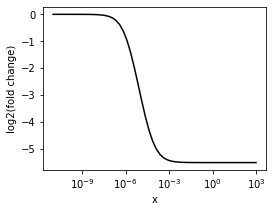

up_down
.,down_up
2499
0.03945619785100595,0.16160768152622362,0.007958199760433228,0.6849528425592017,0.12255963364211085,2.6090195808540315,0.003436565954732943,0.2912687995682081,1.0,5.540757016020786,1.0
0.15749320589558907,2.125593983361005,113.91464267351459,40.98482873355028


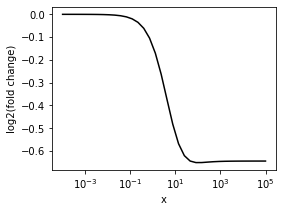

2500
up_down
.,up_down
.,down_up
2769
179.10156015459899,0.2647008617183862,0.007688100503369276,370.3594331477418,0.0157543191157164,0.040700167150434494,0.004923129115280785,0.14860931701889096,1.0,0.6914272188408175,1.0
0.014725450732723551,7.367587913865271,68.96969383899601,0.011998611617619405


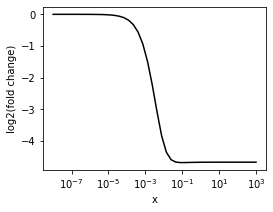

up_down
.,up_down
.,up_down
.,up_down
.,up_down
.,up_down
.,3000
up_down
.,up_down
.,up_down
.,up_down
.,up_down
.,up_down
.,up_down
.,up_down
.,up_down
.,down_up
3346
40.07792382287504,0.2006057384230606,4.480972058678047,1.3609122307760346,0.008309212568883647,16.695841066693884,0.07282374170000668,0.7182475389720525,1.0,0.2221318423938986,1.0
0.015866745382647082,0.0990972091516522,59.839547427930064,0.004318506767227775


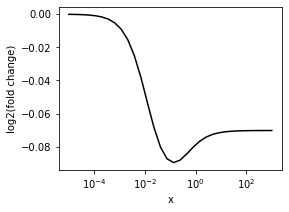

up_down
.,up_down
.,mono_down
3399
66.4531117148753,0.00790967442405893,3.1757781819469653,0.039902811416839726,59.212555188627256,31.082471434837455,0.004726243333373632,0.28619277866935977,1.0,1.8940168634891121,1.0
0.004232468095937119,0.06707935206576134,10.717512842612747,0.009479348070317563


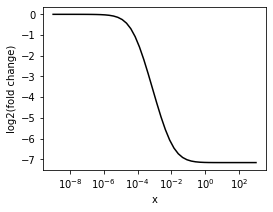

up_down
.,up_down
.,3500
up_down
.,down_up
3546
182.97478001178607,867.4170190212078,0.9774027414493092,989.472626956346,0.378591024629094,0.7030564545557004,950.1714436935569,0.13060930556717384,1.0,0.5241535941777417,1.0
630.2466223931154,321.45939345656905,0.0995834498341833,2.578907567243449


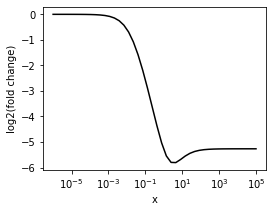

up_down
.,up_down
.,up_down
.,up_down
.,up_down
.,up_down
.,up_down
.,up_down
.,up_down
.,up_down
.,up_down
.,down_up
3797
0.05324366290341088,0.009800994308959301,0.04158207096352719,15.190146488683984,0.7580648807014754,0.00882178745176839,34.253520283593886,0.14929304265015603,1.0,0.19442832648723476,1.0
333.2999936970577,7.809575832469124,0.010385937127688767,0.3357647997900288


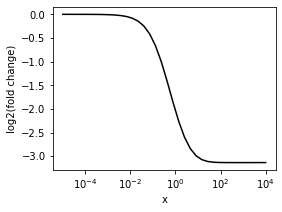

down_up
3941
3.8018252817450846,0.2922600565850442,0.2124273916829174,3.2181272090914357,2.4788544345951773,0.18977252309053919,0.017339304920398004,0.004715421055035919,1.0,1.788962581541914,1.0
0.013310512025662802,236.33467018031916,0.8088333395165095,0.002684376322372967


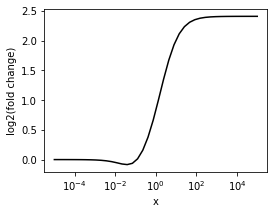

4000
up_down
.,up_down
.,up_down
.,down_up
4100
36.23398228853352,0.020163513870289994,6.083795853069024,117.93659886721365,0.026301778928901724,0.0027299839705437713,0.024398400647753445,0.007113450197775227,1.0,76.35846638353334,1.0
183.692762699481,0.5674917714128895,3.03361326595108,0.003233808894794746


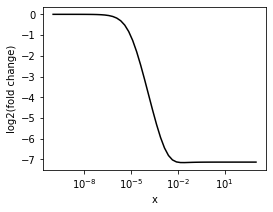

up_down
.,up_down
.,up_down
.,mono_down
4283
10.270138980268648,0.00725033453375588,5.217132933769631,52.76529088130126,280.62970158096766,3.53914450791551,112.05738525068655,0.4471883095434866,1.0,0.005558607666301413,1.0
64.69679669469078,0.08936488811616605,0.005934048718398772,9.455602275322896


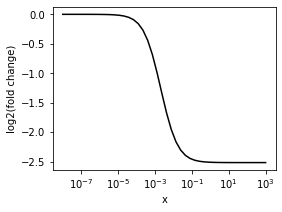

up_down
.,up_down
.,4500
mono_up
.,down_up
4668
599.0514221415043,0.38647073203966853,3.1331954266428803,5.695434224007765,0.02123921478819347,0.16527570035157907,0.4265412974782277,0.00691040616176697,1.0,124.93292090718094,1.0
0.03238945947931867,0.258611628475781,0.11161324525094622,0.006833957328474198


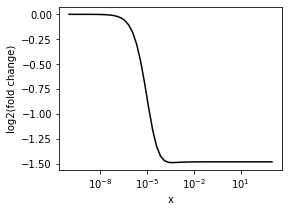

up_down
.,down_up
4699
217.27032439590312,119.00424397388817,39.82749130243464,147.6051433949644,0.5596880268606793,0.9820010463581725,182.99347421438975,0.015357882559872072,1.0,0.012301096855544296,1.0
4.764696718954245,0.0026426528670734158,0.0021726189061874895,8.057472686107243


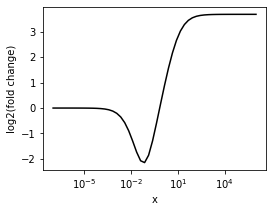

up_down
.,up_down
.,mono_down
4883
15.637675531261786,0.0012349608872272968,2.4180658292202852,1.1737876498567916,0.31809427926664907,148.97129159105845,0.0017726252183096873,0.23767880423021187,1.0,762.4130047328775,1.0
0.002049701652599248,0.012415448707084331,268.7973939886624,1.217170916156621


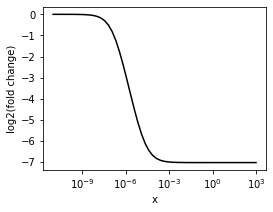

up_down
.,

In [9]:
#qi!=1, gamma==1-> 
   
kbx=1
kwargs={"check_out0":False,"out0_tol":1e-4,"plotmultipeak":True,"verbose":True}
n_per_om=4
np.random.seed(1)

niter=5000

for i in range(niter):
    if i%500==0:
        print(i)
    
    ax,bx,aP_0_0,bP_P_0,kopen0,kclose0,alpha,w=10**np.random.uniform(-3,3,size=8)
    gamma=1
    beta=10**np.random.uniform(-3,0) #beta<1
    
    if aP_0_0*beta>10**(-3) and aP_0_0*beta<10**3 and aP_0_0<ax and bP_P_0>bx:#keep in range, assume pol has less affinity than x in closed c
        q3,q4,q7,q8=10**np.random.uniform(-3,3,size=4)
        qs=[q3,q4,q7,q8]
        
        pars=np.array([ax,bx,aP_0_0,bP_P_0,kopen0,kclose0,alpha,beta,gamma,w,kbx])
        parset=getparset(pars)
        
        parset=np.concatenate((parset,qs))
        instance.fill_num_den(parset,othervars)
        monotonic=instance.interfacemonotonic()
        if np.any(monotonic != -2):
            #print("nonm")
            score_out,f,Amin,Amax,n=score(parset,ssfunc=ssfunc,scoref=get_score_up_down_v2,n=None,Amin=None,Amax=None,plot=False,returnout=True,log2out=True,n_per_om=n_per_om,**kwargs)
            #print(score_out)
            if score_out[0]<0:
                print(i)
                print(",".join(map(str,pars)))
                print(",".join(map(str,qs)))
                log10Amin=np.log10(Amin)
                log10Amax=np.log10(Amax)
                orders_m=log10Amax-log10Amin
                n=int(n_per_om*np.ceil(orders_m))
                Avals=np.logspace(log10Amin,log10Amax,n)
                
                plt.figure(figsize=(4,3))
                plt.plot(Avals,f,color="k")

                plt.xscale("log")
                plt.xlabel("x")
                plt.ylabel("log2(fold change)")
                plt.show()
            else:
                print(".",end=",")

('ax', 21.369925978246965)
('bx', 1.7562052965765018)
('aP_0_0', 18.970244004978806)
('bP_P_0', 220.06496710459825)
('kopen0', 0.0016660417626531243)
('kclose0', 0.009320640026536908)
('alpha', 0.017262090983741405)
('beta', 0.11547605550856133)
('gamma', 1.0)
('w', 1.94604634122423)
('kbx', 1.0)
('q3', 0.11323747833441965)
('q4', 165.50559776036175)
('q7', 188.4456843426711)
('q8', 0.013827095734449296)


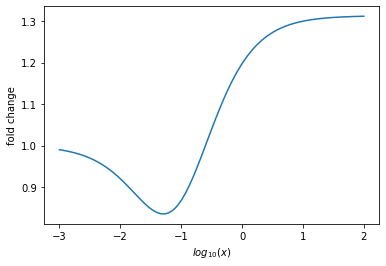

In [11]:
parnames="ax,bx,aP_0_0,bP_P_0,kopen0,kclose0,alpha,beta,gamma,w,kbx".split(",")
pars=np.array([21.369925978246965,1.7562052965765018,18.970244004978806,220.06496710459825,0.0016660417626531243,0.009320640026536908,0.017262090983741405,0.11547605550856133,1.0,1.94604634122423,1.0])
qs=[0.11323747833441965,165.50559776036175,188.4456843426711,0.013827095734449296]
for p in zip(parnames,pars):
    print(p)
for p in zip("q3,q4,q7,q8".split(","),qs):
    print(p)
parset=getparset(pars)
parset=np.concatenate((parset,qs))
instance.fill_num_den(parset,othervars)
expr0=instance.interfaceGRF(0)
xvals=np.logspace(-3,2,1000)
expr=np.zeros_like(xvals)
for x_,x in enumerate(xvals):
    expr[x_]=instance.interfaceGRF(x)/expr0
plt.plot(np.log10(xvals),expr)
plt.xlabel(r"$log_{10}(x)$")
plt.ylabel("fold change")
plt.show()


0
up_down
.,up_down
.,up_down
.,500
up_down
.,up_down
.,up_down
.,up_down
.,1000
up_down
.,1500
down_up
.,up_down
.,.,up_down
.,up_down
.,down_up
.,2000
down_up
.,up_down
.,up_down
.,2500
up_down
.,.,up_down
.,3000
down_up
.,up_down
.,up_down
.,up_down
.,down_up
.,down_up
.,3500
up_down
.,4000
up_down
.,mono_down
.,4500
up_down
.,5000
up_down
.,up_down
.,up_down
.,up_down
.,up_down
.,5500
down_up
.,up_down
.,up_down
.,mono_down
.,6000
down_up
.,up_down
.,up_down
.,up_down
.,up_down
.,6500
mono_up
.,down_up
.,up_down
.,7000
up_down
.,down_up
.,down_up
.,7500
down_up
.,down_up
.,8000
down_up
.,down_up
.,up_down
.,up_down
.,up_down
.,8500
down_up
.,mono_up
.,up_down
.,9000
up_down
.,up_down
.,down_up
.,9500
up_down
.,down_up
9581
13.13636885328402,0.018924159115492827,0.26651689208564355,0.019012221141430568,0.25213246096136127,0.0013698722289065175,0.004447868544883613,0.8487997165933898,1.0,0.028096482814712317,1.0
0.00450315049609052,29.837519421100332,4.199555291177168,0.1530381147095

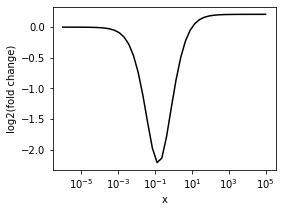

up_down
.,down_up
.,down_up
.,up_down
.,up_down
.,up_down
.,10000
down_up
.,10500
up_down
.,11000
up_down
.,up_down
.,up_down
.,up_down
.,up_down
.,down_up
.,11500
up_down
.,mono_down
.,12000
down_up
.,up_down
.,up_down
.,down_up
.,12500
13000
down_up
.,up_down
.,13500
up_down
.,down_up
.,14000
down_up
.,up_down
.,14500
up_down
.,mono_up
.,up_down
.,up_down
.,up_down
.,up_down
.,15000
down_up
.,up_down
.,down_up
.,15500
down_up
15694
0.06357780066494903,0.10191335634986613,0.022121770807244787,0.17341056971787092,0.17590922912617662,0.0032587078092348462,0.007653658626889024,0.06705817314866581,1.0,0.7145022423191297,1.0
0.14990088769050075,2.088940152206175,0.09231904642082167,0.001868845824654958


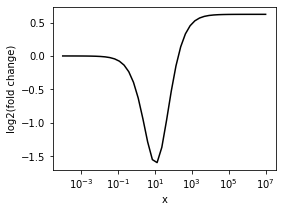

up_down
.,16000
down_up
.,down_up
.,down_up
.,up_down
.,mono_up
.,16500
up_down
.,up_down
.,up_down
.,up_down
.,up_down
.,17000
down_up
17064
79.20512985755664,7.674080055023064,0.2890812617496295,39.20958784934064,73.28854502105574,4.8891521626960905,0.0016718497584487437,0.0038960325715608874,1.0,0.026782398462484428,1.0
6.725985208168905,713.6243527676928,0.1762902782990976,0.0010389139911849792


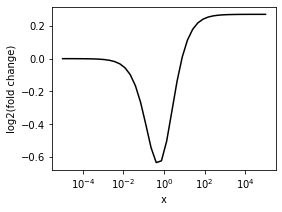

up_down
.,17500
up_down
.,up_down
.,up_down
.,up_down
.,up_down
.,up_down
.,18000
up_down
.,up_down
.,up_down
.,down_up
.,18500
down_up
.,down_up
18967
1.617138410843569,238.01030422050297,1.3636840447305985,245.20893460421362,0.046198781270347766,1.2991909964941744,0.0013866320031426407,0.1267766916814677,1.0,0.0020495812157680375,1.0
0.2795946342980154,755.5435384637937,3.5305047444617945,12.023242248510739


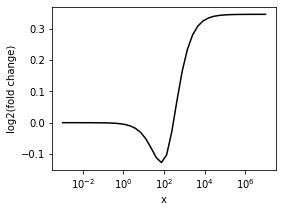

19000
down_up
.,up_down
.,up_down
.,down_up
.,19500
down_up
.,up_down
.,

In [47]:
#qi!=1, gamma==1, alpha<1, omega<1
#plot only down-up if it goes above 1
   
kbx=1
kwargs={"check_out0":False,"out0_tol":1e-4,"plotmultipeak":True,"verbose":True}
n_per_om=4
np.random.seed(1)

niter=20000

for i in range(niter):
    if i%500==0:
        print(i)
    
    ax,bx,aP_0_0,bP_P_0,kopen0,kclose0,alpha,w=10**np.random.uniform(-3,3,size=8)
    gamma=1
    beta=10**np.random.uniform(-3,0) #beta<1
    
    if alpha<1 and w<1 and aP_0_0*beta>10**(-3) and aP_0_0*beta<10**3 and aP_0_0<ax and bP_P_0>bx:#keep in range, assume pol has less affinity than x in closed c
        q3,q4,q7,q8=10**np.random.uniform(-3,3,size=4)
        qs=[q3,q4,q7,q8]
        
        pars=np.array([ax,bx,aP_0_0,bP_P_0,kopen0,kclose0,alpha,beta,gamma,w,kbx])
        parset=getparset(pars)
        
        parset=np.concatenate((parset,qs))
        instance.fill_num_den(parset,othervars)
        monotonic=instance.interfacemonotonic()
        if np.any(monotonic != -2):
            #print("nonm")
            score_out,f,Amin,Amax,n=score(parset,ssfunc=ssfunc,scoref=get_score_up_down_v2,n=None,Amin=None,Amax=None,plot=False,returnout=True,log2out=True,n_per_om=n_per_om,**kwargs)
            #print(score_out)
            if score_out[0]<0 and f[-1]>0:
                print(i)
                print(",".join(map(str,pars)))
                print(",".join(map(str,qs)))
                log10Amin=np.log10(Amin)
                log10Amax=np.log10(Amax)
                orders_m=log10Amax-log10Amin
                n=int(n_per_om*np.ceil(orders_m))
                Avals=np.logspace(log10Amin,log10Amax,n)
                
                plt.figure(figsize=(4,3))
                plt.plot(Avals,f,color="k")

                plt.xscale("log")
                plt.xlabel("x")
                plt.ylabel("log2(fold change)")
                plt.show()
            else:
                print(".",end=",")